# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [5]:
#Create a dataframe for the cities information, and make the columns required for further data.
cities_df = pd.DataFrame({'City': cities})

#Create columns for the data desired in subsequent steps. Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed
cities_df['Cloudiness'] = ''
cities_df['Country']=''
cities_df['Date']=''
cities_df['Humidity']=''
cities_df['Lat']=''
cities_df['Lng']=''
cities_df['Max Temp']=''
cities_df['Wind Speed']=''

cities_df.head(10)

City Cloudiness Country Date Humidity Lat Lng Max Temp Wind Speed
0  mar del plata                                                             
1        arandis                                                             
2          tiksi                                                             
3       hermanus                                                             
4        qaanaaq                                                             
5     bredasdorp                                                             
6      mahebourg                                                             
7    tuktoyaktuk                                                             
8         lompoc                                                             
9          goure

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#base url for OpenWeather. Also establish a results list to append all search data in case needed.
base_url = 'https://api.openweathermap.org/data/2.5/weather?'
results = []

#Create full url including api_key, then loop through cities_short_df. This is a dataframe, so we
#have to use the iterrows() method.
for index, rows in cities_df.iterrows():
    full_url = base_url + '&appid=' + api_key + '&units=metric' + '&q=' + rows[0]
    
#use base_url and params to submit for iterative calls to OpenWeather API. Append responses to results list.
    response = requests.get(full_url).json()
    results.append(response)
    
#Take the response for each city call from OpenWeather API. Determine how to extract
#desired data into columns in the cities_short_df DataFrame.
    try:
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        
    except: KeyError
    
cities_df

City Cloudiness Country        Date Humidity    Lat     Lng  \
0      mar del plata          0      AR  1573486765       45 -46.43  -67.52   
1            arandis          0      NA  1573486765       85 -22.42   14.98   
2              tiksi        100      RU  1573486766       91  71.64  128.87   
3           hermanus        100      ZA  1573486766       81 -34.42   19.24   
4            qaanaaq          0      GL  1573486766       52  77.48  -69.36   
5         bredasdorp         79      ZA  1573486766       77 -34.53   20.04   
6          mahebourg         75      MU  1573486767       78 -20.41    57.7   
7        tuktoyaktuk         90      CA  1573486767       92  69.44 -133.03   
8             lompoc         90      US  1573486551      100  34.64 -120.46   
9              goure        100      NE  1573486514       11  13.98   10.27   
10      norman wells         75      CA  1573486498       84  65.28 -126.83   
11           buribay         49      RU  1573486768       82  51.96   58.16   
12       yellowknife         40      CA  1573486509       78  62.45 -114.38   
13           rikitea        100      PF  1573486768       92 -23.12 -134.97   
14             kuche                                                          
15          thompson         20      CA  1573486768       67  55.74  -97.86   
16        borogontsy        100      RU  1573486769       98  62.67  131.17   
17         hay river         20      CA  1573486769       71  60.82 -115.79   
18         carnarvon          0      ZA  1573486769       10 -30.97   22.13   
19           mataura         67      NZ  1573486769       85 -46.19  168.86   
20              paka        100      CF  1573486770       54   4.15   15.03   
21             vaini         20      IN  1573486770       73  15.34   74.49   
22           terrace         90      CA  1573486770       92  54.52 -128.61   
23            tadine         11      NC  1573486770       76 -21.55  167.88   
24     mount gambier         90      AU  1573486514       81 -37.83  140.78   
25             bluff         90      AU  1573486771       71 -23.58  149.07   
26     alta floresta        100      BR  1573486771       95  -9.87  -56.08   
27            kiunga        100      PG  1573486771       99  -6.12   141.3   
28     half moon bay         90      US  1573486608      100  37.46 -122.43   
29            katobu          1      ID  1573486772       83  -4.94  122.53   
..               ...        ...     ...         ...      ...    ...     ...   
593         itaituba         20      BR  1573486914       63  -4.26  -55.99   
594          xuanhua        100      CN  1573486915       49  40.61  115.04   
595           bandar         40      BD  1573486915       94  22.29   91.78   
596              van          0      TR  1573486915       60  38.51   43.37   
597    anton lizardo          5      MX  1573486915       83  19.05  -95.98   
598        dalhousie          1      CA  1573486916       53  48.06  -66.37   
599          rungata                                                          
600   port macquarie         90      AU  1573486916       87 -31.43  152.91   
601       whitehorse         90      CA  1573486638       84  60.72 -135.06   
602            nioro        100      GM  1573486917       11  13.79  -15.05   
603           kabare         75      RW  1573486917       73  -1.65   29.38   
604          vaitape          0      PF  1573486917       83 -16.52 -151.75   
605          logrono         75      ES  1573486918       76  42.47   -2.45   
606       mugur-aksy        100      RU  1573486918       99  50.38   90.44   
607        mount isa          3      AU  1573486918       13 -20.73  139.49   
608         chimbote         47      PE  1573486918       60  -9.08  -78.59   
609         berlevag          5      NO  1573486919       79  70.86   29.09   
610          yenagoa         77      NG  1573486919       79   4.92    6.26   
611    leshukonskoye         14      RU  1573486919       94   64.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_df.to_csv('cities_weather_data.csv', index=False, header=True)

In [1]:
#Saved all raw output from response in requests.get (results list). Found that all blank rows were from
# {'cod': '404', 'message': 'city not found'}. I suspect these cities are not in OpenWeather API.
#I have the cities_weather.csv with all of the data intact. I will also generate a "cleaned" .csv
#with blank rows removed.
#Blank entries are NOT considered null values! First used .replace to replace inplace all blank ('')
#entries with np.nan (which is NaN).
#Then used .dropna()

#NOTE: This often doesn't work for me! I can replace the '' with 'NA' or 'NaN', but the .dropna(how='any')
#fails to drop any rows, even when all of the entries other than city are NaN. Everytime I researt the kernel
#the cities change. I will reload from the .csv and proceed from there. This is a MAJOR problem with the design
#of this type of strategy.
#cities_df.replace('NA', 'NaN', inplace=True)
#cities_cleaned_df = cities_df.dropna(how='any')
#cities_cleaned_df.to_csv('cities_weather_data_cleaned.csv', index=False, header=True)

NameError: name 'cities_df' is not defined

In [11]:
#Reloading cities_df, then clean and resave the cities_weather_data_cleaned.csv file. Now, the
#.dropna(how='any') worked. This is often very confusing to me!!!
weather = pd.read_csv('cities_weather_data.csv', delimiter=',')
weather2 = weather.dropna(how='any')
weather2.to_csv('cities_weather_data_cleaned.csv', index=False, header=True)

In [12]:
#Now use this 'cities_weather_data_cleaned.csv' for all subsequent steps. DO NOT RUN ALL OF THE CELLS AGAIN!!!
weather2.head(20)

City  Cloudiness Country          Date  Humidity    Lat     Lng  \
0   mar del plata         0.0      AR  1.573487e+09      45.0 -46.43  -67.52   
2           tiksi       100.0      RU  1.573487e+09      91.0  71.64  128.87   
3        hermanus       100.0      ZA  1.573487e+09      81.0 -34.42   19.24   
4         qaanaaq         0.0      GL  1.573487e+09      52.0  77.48  -69.36   
5      bredasdorp        79.0      ZA  1.573487e+09      77.0 -34.53   20.04   
6       mahebourg        75.0      MU  1.573487e+09      78.0 -20.41   57.70   
7     tuktoyaktuk        90.0      CA  1.573487e+09      92.0  69.44 -133.03   
8          lompoc        90.0      US  1.573487e+09     100.0  34.64 -120.46   
9           goure       100.0      NE  1.573487e+09      11.0  13.98   10.27   
10   norman wells        75.0      CA  1.573486e+09      84.0  65.28 -126.83   
11        buribay        49.0      RU  1.573487e+09      82.0  51.96   58.16   
12    yellowknife        40.0      CA  1.573487e+09      78.0  62.45 -114.38   
13        rikitea       100.0      PF  1.573487e+09      92.0 -23.12 -134.97   
15       thompson        20.0      CA  1.573487e+09      67.0  55.74  -97.86   
16     borogontsy       100.0      RU  1.573487e+09      98.0  62.67  131.17   
17      hay river        20.0      CA  1.573487e+09      71.0  60.82 -115.79   
18      carnarvon         0.0      ZA  1.573487e+09      10.0 -30.97   22.13   
19        mataura        67.0      NZ  1.573487e+09      85.0 -46.19  168.86   
20           paka       100.0      CF  1.573487e+09      54.0   4.15   15.03   
21          vaini        20.0      IN  1.573487e+09      73.0  15.34   74.49   

    Max Temp  Wind Speed  
0      18.06        2.71  
2     -18.45        2.49  
3      21.11        2.68  
4     -15.00        2.25  
5      21.11        8.20  
6      26.00        3.60  
7      -3.00       10.30  
8      14.44        1.50  
9      35.00        0.89  
10    -15.00        1.00  
11     -0.34        2.42  
12     -9.44        1.00  
13     22.02       11.20  
15    -32.00        1.66  
16    -26.79        2.21  
17    -15.00        3.60  
18     28.18        9.14  
19      5.56        1.79  
20     29.21        0.91  
21     23.00        2.10

In [19]:
#Have to derive the actual date from the Unix date information. Since we have to rely
#on the date for the majority of the data, I will use the most prevalent Unix date
#and extract the Gregorian Date from this.

#Online, there is a datetime module specifically for this problem.
from datetime import datetime

timestamp = weather2['Date'][0]
dt_object = datetime.fromtimestamp(timestamp)
print(f'dt_object = {dt_object}')
print(f'type of object = {type(dt_object)}')

dt_object = 2019-11-11 09:39:25
type of object = <class 'datetime.datetime'>


In [28]:
#Quality Control Check: One potential problem I can forsee is that the random distribution of
#cities by coordinates may not randomly distribute actual cities used in the sample. To evaluate
#this potential, one approach would be to bin the 'Lat' data and see the number of different
#cities in each of the bins.
lat_bins = [-90, -70, -50, -30, -10, 10, 30, 50, 70, 90]
bin_means = (np.histogram(weather2['Lat'], lat_bins))
bin_means

#These data suggest that there is a bias in distribution to the +Lat direction (more cities above
#the Equator are sampled). The question is if this would negatively impact the results. Further
#examination would be necessary for us to have confidence in our answer.

(array([  0,   3,  48,  65,  85,  95, 125, 124,  12], dtype=int64),
 array([-90, -70, -50, -30, -10,  10,  30,  50,  70,  90]))

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

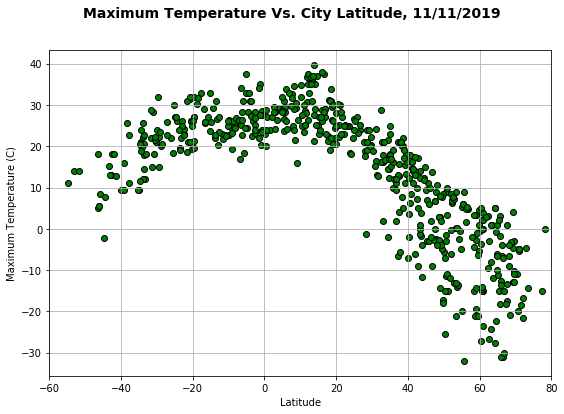

In [53]:
#Latitude versus Max Temperature in the weather2 dataset.
plt.figure(figsize=(9,6))
plt.scatter(weather2['Lat'], weather2['Max Temp'], marker='o', facecolor='g', edgecolor='k')

plt.suptitle('Maximum Temperature Vs. City Latitude, 11/11/2019', fontsize=14, fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (C)')
plt.xlim(-60, +80)
plt.grid()

plt.savefig('MaxTempVsCityLat', dpi=300)
#Latitudes closer to the Equator do have higher maximum temperatures, but historical and larger-scale
#data are needed to determine if this trend is extendable over longer historical timeframes.
#In correlation with the binning data above, this graph shows lower temperatures in the +40 to +60 Lat
#region versus the -40 to -60 Lat region. This may be a sampling issue as indicated by the binning data,
#but also potentially a hemispherical difference not previously considered.

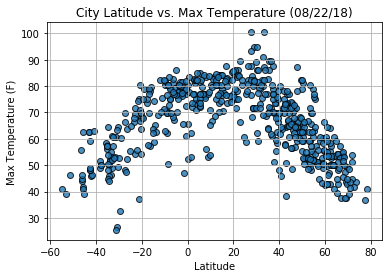

#### Latitude vs. Humidity Plot

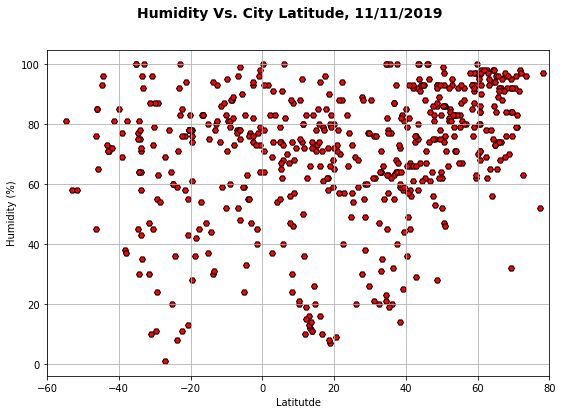

In [56]:
#Latitude versus Humidity in the weather2 data set.
plt.figure(figsize=(9,6))
plt.scatter(weather2['Lat'], weather2['Humidity'], marker='H', facecolor='r', edgecolor='k')

plt.suptitle('Humidity Vs. City Latitude, 11/11/2019', fontsize=14, fontweight='bold')
plt.xlabel('Latitutde')
plt.ylabel('Humidity (%)')
plt.xlim(-60, 80)
plt.grid()

plt.savefig('HumidityVsCityLat', dpi=300)
#Not much of any correlation that is observable.

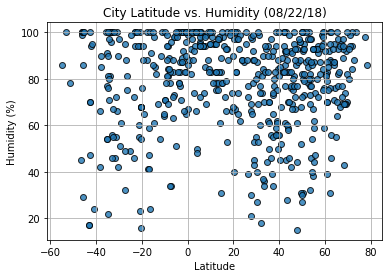

#### Latitude vs. Cloudiness Plot

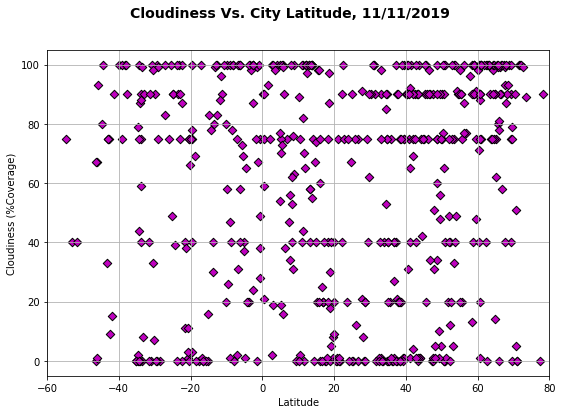

In [66]:
#Latitude versus Cloudiness in weather2 dataset.

plt.figure(figsize=(9,6))
plt.scatter(weather2['Lat'], weather2['Cloudiness'], marker='D', facecolor='m', edgecolor='k')

plt.suptitle('Cloudiness Vs. City Latitude, 11/11/2019', fontsize=14, fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%Coverage)')
plt.xlim(-60, 80)
plt.grid()

plt.savefig('CloudinessVsCityLat', dpi=300)
#Correlation between latitude and cloudiness is not obvious.

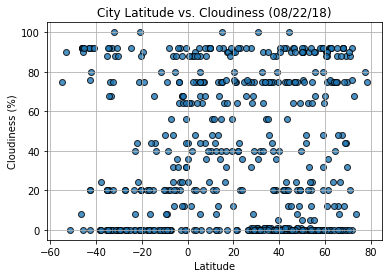

#### Latitude vs. Wind Speed Plot

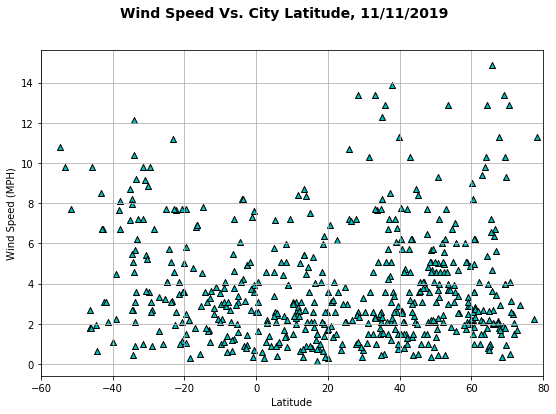

In [68]:
#Wind Speed versus City Latitude
plt.figure(figsize=(9,6))
plt.scatter(weather2['Lat'], weather2['Wind Speed'], marker='^', facecolor='c', edgecolor='k')

plt.suptitle('Wind Speed Vs. City Latitude, 11/11/2019', fontsize=14, fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.xlim(-60, 80)
plt.grid()

plt.savefig('WindSpeedVsCityLat', dpi=300)
#Correlation between wind speed and latitude is marginal, but maybe lower wind speeds observed
#nearer the Equator versus at higher and lower latitudes.

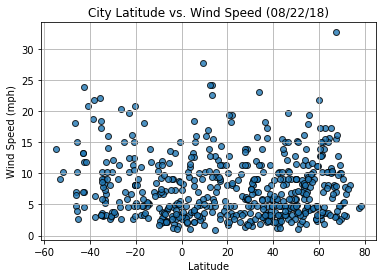